In [ ]:
# Import necessary machine learning libraries
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle  # For saving models and preprocessing steps
import nltk
import re  # Regular expressions for text cleaning
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings for clean output

# Import libraries for data processing and feature extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Machine learning model for emotion detection
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.txt to train.txt


In [ ]:
# Load dataset from the same directory where the script is running
train_data = pd.read_csv('train.txt', header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')

# Display first few rows to confirm successful loading
print(train_data.head())


                                             Comment  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [ ]:
import pandas as pd
import numpy as np
import re
!pip install neattext # Install the mis'neattext' library
import neattext as nt  # For text cleaning
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # This line was added

# Load training data
train_data = pd.read_csv(
    'train.txt',   # File path
    header=None,   # No header in the file
    sep=';',       # Separator used in the file
    names=['Comment', 'Emotion'],  # Assigning column names
    encoding='utf-8'  # Encoding format to handle special characters
)

# Display the first few rows to verify data loading
print("Dataset preview:")
print(train_data.head())

# Check for missing values
print("\nMissing values in dataset:")
print(train_data.isnull().sum())

# Drop rows with missing values (if any)
train_data.dropna(inplace=True)

# Display dataset shape
print(f"\nDataset contains {train_data.shape[0]} rows and {train_data.shape[1]} columns after removing missing values.")

# Convert text to lowercase
train_data['Comment'] = train_data['Comment'].str.lower()

# Remove special characters and numbers
train_data['Comment'] = train_data['Comment'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

# Remove extra spaces
train_data['Comment'] = train_data['Comment'].apply(lambda x: " ".join(x.split()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
train_data['Comment'] = train_data['Comment'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word not in stop_words]))

# Print cleaned text samples
print("\nCleaned text samples:")
print(train_data['Comment'].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.8 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Dataset preview:
                                             Comment  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

Missing values in dataset:
Comment    0
Emotion    0
dtype: int64

Dataset contains 16000 rows and 2 columns after removing missing values.

Cleaned text samples:
0                                didnt feel humiliated
1    go feeling hopeless damned hopeful around some...
2            im grabbing minute post feel greedy wrong
3    ever feeling nostalgic fireplace know still pr...
4                                      feeling grouchy
Name: Comment, dtype: object


In [ ]:
train_data

,Comment,Emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15995,brief time beanbag said anna feel like beaten,sadness
15996,turning feel pathetic still waiting tables sub...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment im glad,anger


In [ ]:
train_data.shape

(16000, 2)

In [ ]:
# Add a new column to store the length of each comment
train_data['length'] = train_data['Comment'].apply(len)


In [ ]:
print(train_data.head())  # Shows the first 5 rows


                                             Comment  Emotion  length
0                              didnt feel humiliated  sadness      21
1  go feeling hopeless damned hopeful around some...  sadness      61
2          im grabbing minute post feel greedy wrong    anger      41
3  ever feeling nostalgic fireplace know still pr...     love      52
4                                    feeling grouchy    anger      15


In [ ]:
# Drop duplicate "Length" column if it exists
if 'Length' in train_data.columns:
    train_data.drop(columns=['Length'], inplace=True)

# Rename the "length" column to maintain consistency
train_data.rename(columns={'length': 'Length'}, inplace=True)

# Display updated dataframe
print(train_data.head())


                                             Comment  Emotion  Length
0                              didnt feel humiliated  sadness      21
1  go feeling hopeless damned hopeful around some...  sadness      61
2          im grabbing minute post feel greedy wrong    anger      41
3  ever feeling nostalgic fireplace know still pr...     love      52
4                                    feeling grouchy    anger      15


In [ ]:
# Check and print missing values
missing_values = train_data.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values per column:\n", missing_values[missing_values > 0])


No missing values found in the dataset.


In [ ]:
# Count and display duplicate rows in a more readable format
duplicate_count = train_data.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"The dataset contains {duplicate_count} duplicate rows.")


The dataset contains 85 duplicate rows.


In [ ]:
# Remove duplicate rows
train_data.drop_duplicates(inplace=True)

# Display confirmation message
print(f"Duplicate rows removed. The dataset now contains {train_data.shape[0]} rows.")


Duplicate rows removed. The dataset now contains 15915 rows.


In [ ]:
print(train_data.head())  # Shows the first 5 rows


                                             Comment  Emotion  Length
0                              didnt feel humiliated  sadness      21
1  go feeling hopeless damned hopeful around some...  sadness      61
2          im grabbing minute post feel greedy wrong    anger      41
3  ever feeling nostalgic fireplace know still pr...     love      52
4                                    feeling grouchy    anger      15


In [ ]:
# Get unique emotion labels and display them properly
unique_emotions = train_data['Emotion'].unique()

print(f"Unique emotions in the dataset: {list(unique_emotions)}")


Unique emotions in the dataset: ['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']


In [ ]:
# Count occurrences of each emotion and display in a formatted way
emotion_counts = train_data['Emotion'].value_counts()

print("Emotion Distribution in Dataset:\n")
print(emotion_counts.to_string())  # Ensures clean output without scientific notation


Emotion Distribution in Dataset:

Emotion
joy         5342
sadness     4635
anger       2142
fear        1927
love        1299
surprise     570


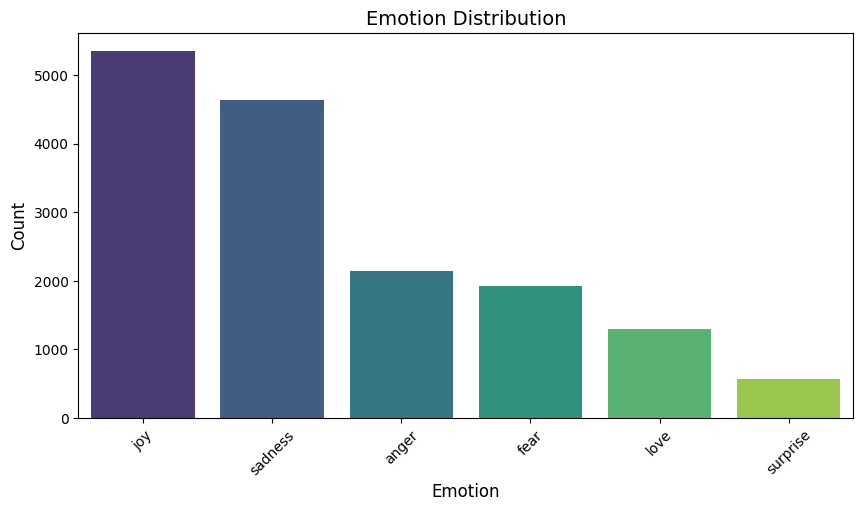

In [ ]:
# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a count plot for emotions
sns.countplot(x=train_data['Emotion'], palette='viridis', order=train_data['Emotion'].value_counts().index)

# Add title and labels
plt.title("Emotion Distribution", fontsize=14)
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [ ]:
# Create a deep copy of train_data with a new variable name
train_data_copy = train_data.copy(deep=True)


In [ ]:
# Extract length values as a NumPy array
length_values = train_data_copy['Length'].to_numpy()


In [ ]:
print(length_values)  # Prints the entire array


[21 61 41 ... 24 30 28]


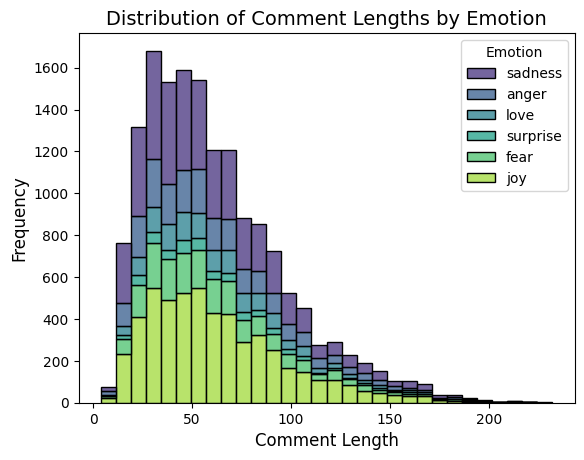

In [ ]:
# Plot histogram of comment lengths with emotion-based coloring
sns.histplot(data=train_data_copy, x='Length', hue='Emotion', multiple='stack', bins=30, palette='viridis')

# Add labels and title for better understanding
plt.xlabel("Comment Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Comment Lengths by Emotion", fontsize=14)

# Show the plot
plt.show()


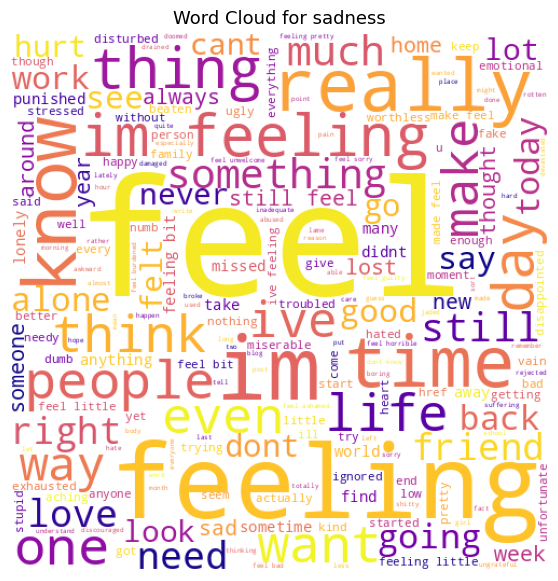

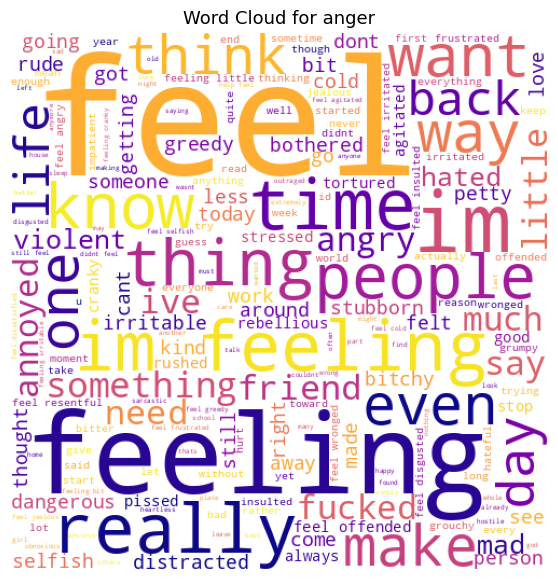

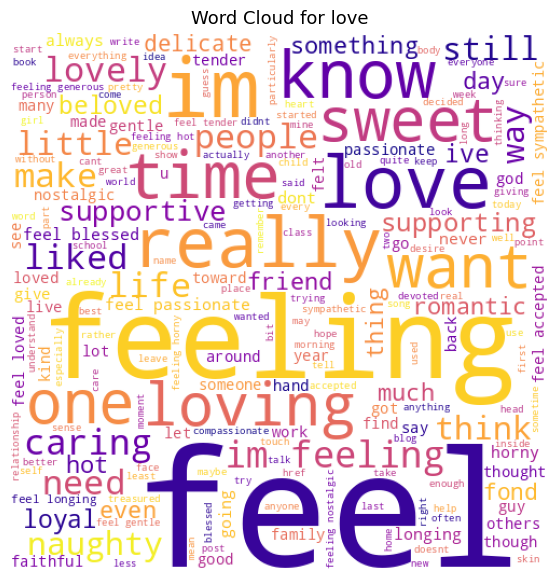

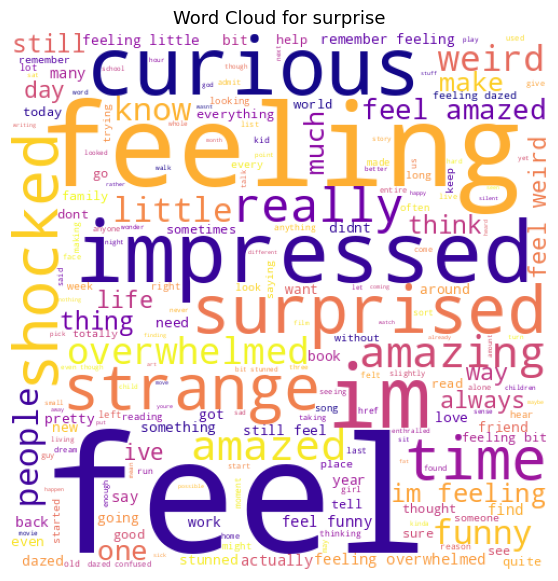

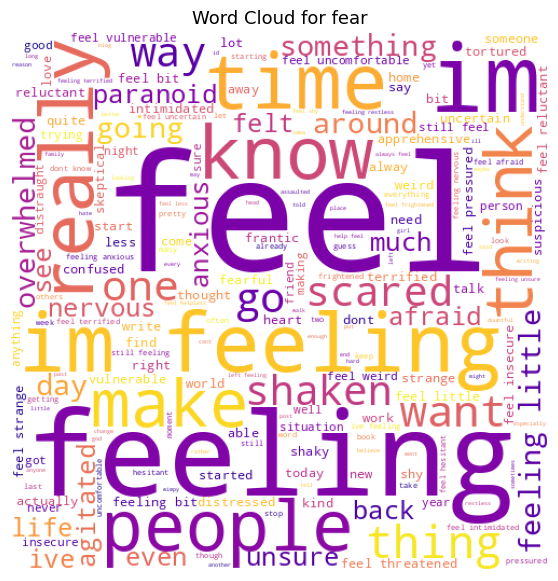

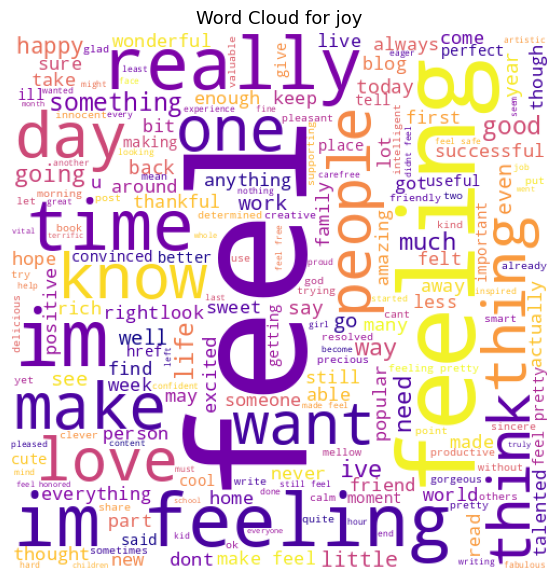

In [ ]:
from wordcloud import WordCloud

# Function to generate and display a word cloud for each emotion
def generate_word_cloud(text, emotion):
    plt.figure(figsize=(7, 7))  # Reduced size for better display
    plt.imshow(WordCloud(width=500, height=500, max_words=200, background_color='white', colormap='plasma').generate(text))
    plt.title(f"Word Cloud for {emotion}", fontsize=13)  # Adjusted font size
    plt.axis("off")
    plt.show()

# Generate word clouds for each emotion
for emotion in train_data['Emotion'].unique():
    emotion_text = ' '.join(train_data.loc[train_data['Emotion'] == emotion, 'Comment'])
    generate_word_cloud(emotion_text, emotion)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode emotion labels into numerical values
train_data['Encoded_Emotion'] = label_encoder.fit_transform(train_data['Emotion'])

# Display mapping of emotions to numerical labels
emotion_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Emotion Label Mapping:", emotion_mapping)


Emotion Label Mapping: {'anger': np.int64(0), 'fear': np.int64(1), 'joy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4), 'surprise': np.int64(5)}


In [ ]:
train_data.head()


,Comment,Emotion,Length,Encoded_Emotion
0,didnt feel humiliated,sadness,21,4
1,go feeling hopeless damned hopeful around some...,sadness,61,4
2,im grabbing minute post feel greedy wrong,anger,41,0
3,ever feeling nostalgic fireplace know still pr...,love,52,3
4,feeling grouchy,anger,15,0


In [ ]:
# Create a duplicate of the dataset to preserve the original data
emotion_data = train_data.copy(deep=True)


In [ ]:
nltk.download('stopwords')

# Load English stopwords into a set for faster lookup
stop_words = set(stopwords.words('english'))

# Function to clean text: remove special characters, convert to lowercase, remove stopwords, and apply stemming
def preprocess_text(text):
    stemmer = PorterStemmer()
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep only letters
    text = text.lower().split()  # Convert to lowercase and tokenize
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Remove stopwords and stem words
    return " ".join(text)  # Join back into a sentence

# Apply the cleaning function to the 'Comment' column
emotion_data['Processed_Comment'] = emotion_data['Comment'].apply(preprocess_text)

# Display sample cleaned text
emotion_data[['Comment', 'Processed_Comment']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Comment,Processed_Comment
0,didnt feel humiliated,didnt feel humili
1,go feeling hopeless damned hopeful around some...,go feel hopeless damn hope around someon care ...
2,im grabbing minute post feel greedy wrong,im grab minut post feel greedi wrong
3,ever feeling nostalgic fireplace know still pr...,ever feel nostalg fireplac know still properti
4,feeling grouchy,feel grouchi


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    emotion_data['Processed_Comment'],  # Use cleaned text
    emotion_data['Emotion'],
    test_size=0.2,  # 20% for testing
    random_state=42,  # Ensures reproducibility
    stratify=emotion_data['Emotion']  # Maintains class distribution
)

# Display the size of each split
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")


Training set: 12732 samples
Testing set: 3183 samples


In [ ]:
train_data.head()


,Comment,Emotion,Length,Encoded_Emotion
0,didnt feel humiliated,sadness,21,4
1,go feeling hopeless damned hopeful around some...,sadness,61,4
2,im grabbing minute post feel greedy wrong,anger,41,0
3,ever feeling nostalgic fireplace know still pr...,love,52,3
4,feeling grouchy,anger,15,0


In [ ]:
train_data.columns


Index(['Comment', 'Emotion', 'Length', 'Encoded_Emotion'], dtype='object')

In [ ]:
train_data['Emotion'].value_counts() # Check if emotions are still balanced after preprocessing


,count
Emotion,
joy,5342
sadness,4635
anger,2142
fear,1927
love,1299
surprise,570


In [ ]:
train_data.isnull().sum() # Ensure there are no missing values

,0
Comment,0
Emotion,0
Length,0
Encoded_Emotion,0


In [ ]:
# Create a copy of the dataset to preserve the original data
emotion_df = train_data.copy(deep=True)


In [ ]:
emotion_df.head()  # To preview the first few rows


,Comment,Emotion,Length,Encoded_Emotion
0,didnt feel humiliated,sadness,21,4
1,go feeling hopeless damned hopeful around some...,sadness,61,4
2,im grabbing minute post feel greedy wrong,anger,41,0
3,ever feeling nostalgic fireplace know still pr...,love,52,3
4,feeling grouchy,anger,15,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer with optimizations
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000, stop_words='english')

# Transform training and testing data
X_train_vect = tfidf_vectorizer.fit_transform(X_train)
X_test_vect = tfidf_vectorizer.transform(X_test)


In [ ]:
# Initialize SVM model with optimized hyperparameters
svm_model = SVC(kernel='linear', C=1.0)

# Train the model
print("\n===== Training Support Vector Machine (SVM) =====")
svm_model.fit(X_train_vect, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_vect)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.4f}")  # Rounded to 4 decimal places

# Display classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))



===== Training Support Vector Machine (SVM) =====

 Model Accuracy: 0.8841

 Classification Report:
              precision    recall  f1-score   support

       anger       0.87      0.87      0.87       428
        fear       0.89      0.83      0.86       385
         joy       0.87      0.93      0.90      1069
        love       0.84      0.68      0.75       260
     sadness       0.93      0.93      0.93       927
    surprise       0.76      0.74      0.75       114

    accuracy                           0.88      3183
   macro avg       0.86      0.83      0.84      3183
weighted avg       0.88      0.88      0.88      3183



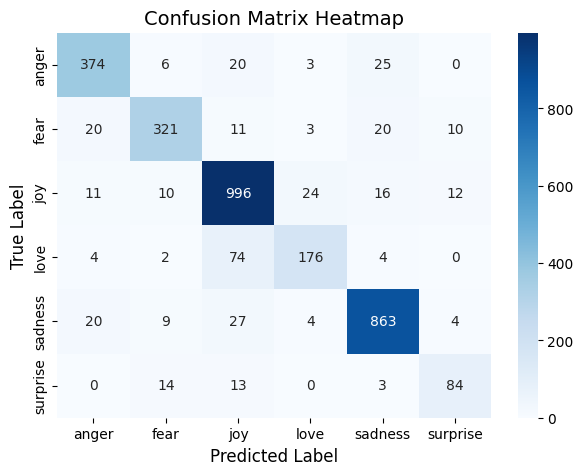

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Define emotions list
emotions = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=emotions) # Use defined emotions list

# Set figure size
plt.figure(figsize=(7, 5))

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)

# Add labels
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.title("Confusion Matrix Heatmap", fontsize=14)

# Show plot
plt.show()

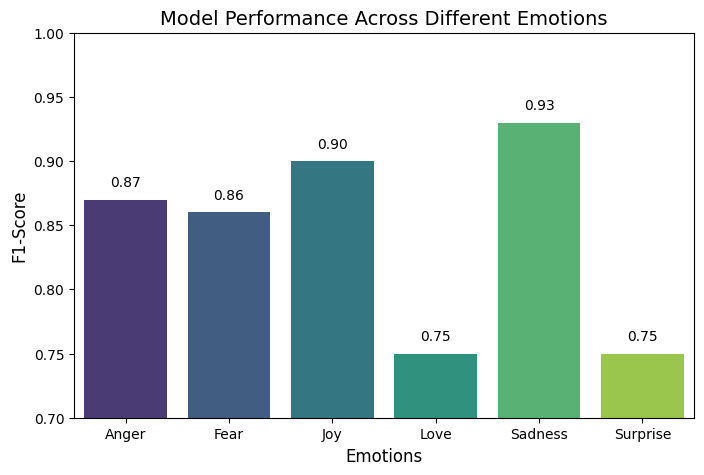

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Emotion categories and corresponding F1-scores from your classification report
emotions = ['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise']
f1_scores = [0.87, 0.86, 0.90, 0.75, 0.93, 0.75]  # F1-scores from your report

# Set figure size
plt.figure(figsize=(8, 5))

# Create a bar chart
sns.barplot(x=emotions, y=f1_scores, palette='viridis')

# Add labels and title
plt.xlabel("Emotions", fontsize=12)
plt.ylabel("F1-Score", fontsize=12)
plt.title("Model Performance Across Different Emotions", fontsize=14)

# Show values on bars
for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f"{score:.2f}", ha='center', fontsize=10)

# Adjust y-axis for better visibility
plt.ylim(0.7, 1.0)

# Show the plot
plt.show()


In [ ]:
import joblib

# Save the trained SVM model and TF-IDF vectorizer
joblib.dump(svm_model, "svm_emotion_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")

print(" Model and vectorizer saved successfully!")


 Model and vectorizer saved successfully!


In [ ]:
import neattext.functions as nfx

# Function to predict emotion from text
def predict_emotion(text):
    # Load trained model and vectorizer
    model = joblib.load("svm_emotion_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")

    # Preprocess input text
    cleaned_text = nfx.remove_puncts(nfx.remove_stopwords(text.lower()))

    # Convert text to vector
    text_vector = vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_emotion = model.predict(text_vector)[0]

    return predicted_emotion


In [ ]:
print("Predicted Emotion:", predict_emotion("I am feeling so happy today! 🎉"))
print("Predicted Emotion:", predict_emotion("I feel so lonely and empty inside."))
print("Predicted Emotion:", predict_emotion("Why do people have to be so rude?"))
print("Predicted Emotion:", predict_emotion("Cuddling with my pet makes my heart melt."))
print("Predicted Emotion:", predict_emotion("I'm really scared about my future."))


Predicted Emotion: sadness
Predicted Emotion: joy
Predicted Emotion: anger
Predicted Emotion: joy
Predicted Emotion: sadness


In [ ]:
if __name__ == "__main__":
    print("\n Emotion Detector Ready! Type a sentence to analyze emotion.")

    while True:
        user_input = input("\nEnter a sentence (or type 'exit' to quit): ")

        if user_input.lower() == "exit":
            print("\n Exiting... Have a great day!")
            break

        emotion = predict_emotion(user_input)
        print(f"💡 Predicted Emotion: {emotion}")



 Emotion Detector Ready! Type a sentence to analyze emotion.
💡 Predicted Emotion: joy
💡 Predicted Emotion: anger
💡 Predicted Emotion: anger


In [ ]:
# The surprise party was the best thing ever, I feel so loved!
# I feel really down today, like everything just feels wrong
# I am so mad right now, i cant even explain how upset I am